In [40]:
from src import ascii
ascii.get_new_shape_with_width((20,10), 5)

(10, 5)

In [41]:
#import importlib.util
import matplotlib.pyplot as plt

In [42]:
import cv2
import torch

Add to dockerfile
```bash
mkdir weights && cd weights
wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=154JgKpzCPW82qINcVieuPH3fZ2e0P812' -O face_parsing.pth
wget https://download.pytorch.org/models/resnet18-5c106cde.pth
```

In [43]:
#m_pathname = 'data/054680.jpg'
im_pathname = 'data/balkany.PNG'
#im_pathname = 'data/two_faces2.jpg'
#im_pathname = 'data/macron.PNG'
#im_pathname = 'data/di_caprio.PNG'
#im_pathname = 'data/face_with_earrings.jpg'
#im_pathname = 'data/image.png'

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')
#device='cpu'

# Read the image using OpenCV
img_origin = cv2.imread(im_pathname)
original_size = img_origin.shape[:2]  # (height, width)

device = cuda


In [44]:
from src.face_segmentation import FaceSegmentation
my_model = FaceSegmentation(device)

In [63]:
[0, 0] + list(img_origin.shape[:2][::-1])

[0, 0, 370, 576]

In [45]:
segments, masks, bboxes, face_parts = my_model.predict(img_origin)

In [49]:
bboxes

[[0, 0, 369, 444],
 [50, 108, 357, 538],
 [251, 231, 342, 257],
 [104, 229, 218, 268],
 None,
 None,
 [71, 247, 360, 330],
 None,
 [4, 249, 51, 383],
 None,
 [189, 268, 277, 391],
 [162, 413, 284, 448],
 [153, 402, 297, 425],
 [150, 402, 301, 470],
 [41, 378, 274, 575],
 None,
 [0, 393, 369, 575],
 [7, 0, 366, 325],
 None]

In [53]:
face_parts

['background',
 'face',
 'left eyebrow',
 'right eyebrow',
 'left eye',
 'right eye',
 'glasses',
 'left ear',
 'right ear',
 'earrings',
 'noise',
 'inside the mouth',
 'upper lips',
 'lower lips',
 'neck',
 'necklace',
 'clothes',
 'hair',
 'hat']

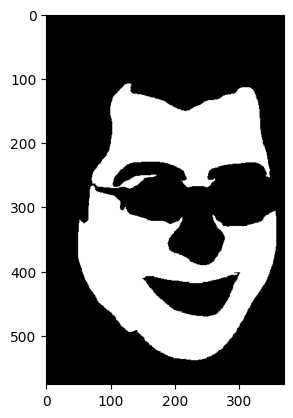

In [47]:
import numpy as np
mat = np.zeros(img_origin.shape[:2])
mat[masks[1] == 1]=1
plt.imshow(mat, cmap='gray')
plt.show()

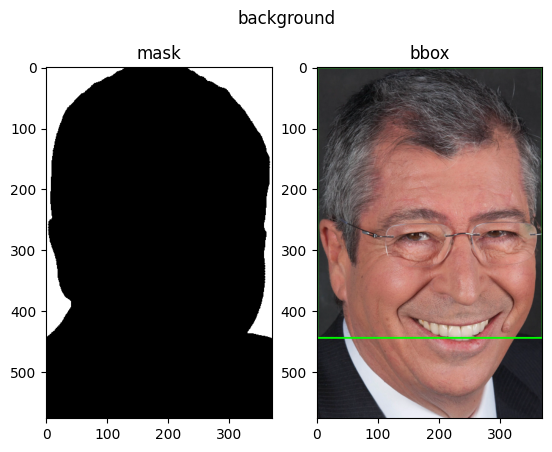

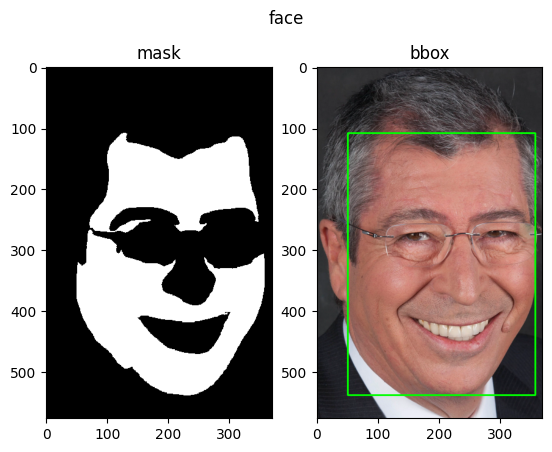

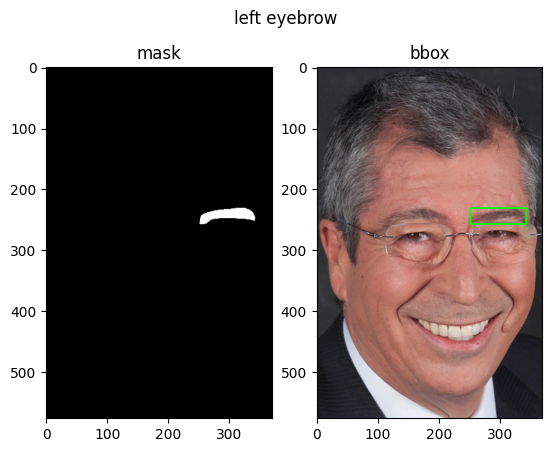

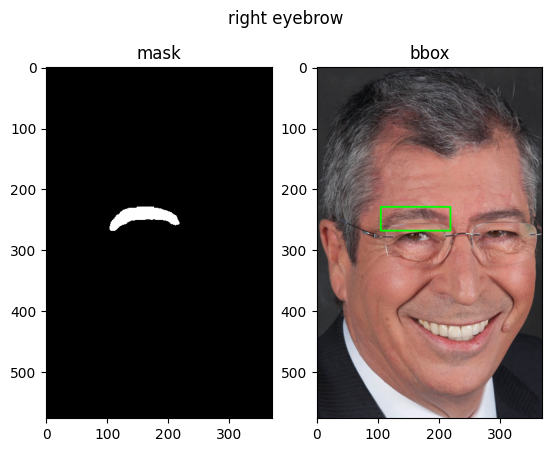

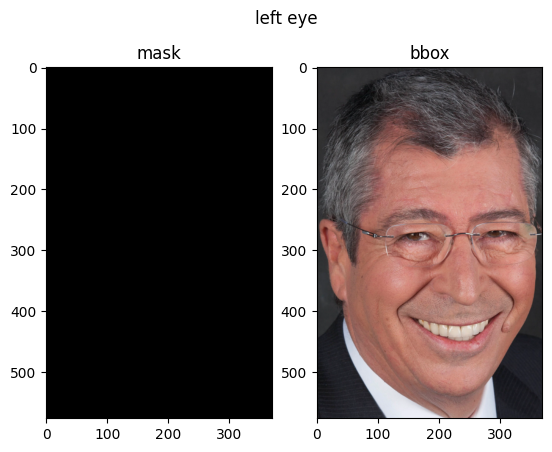

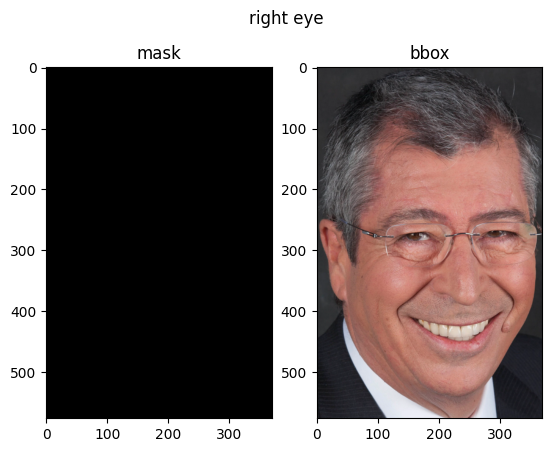

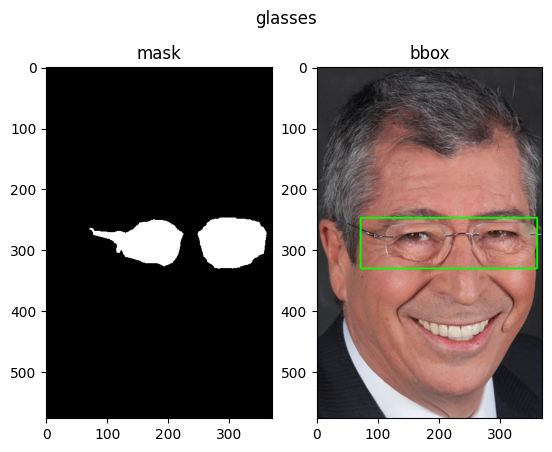

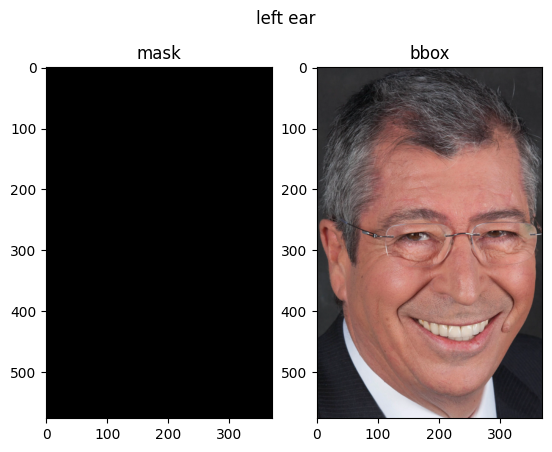

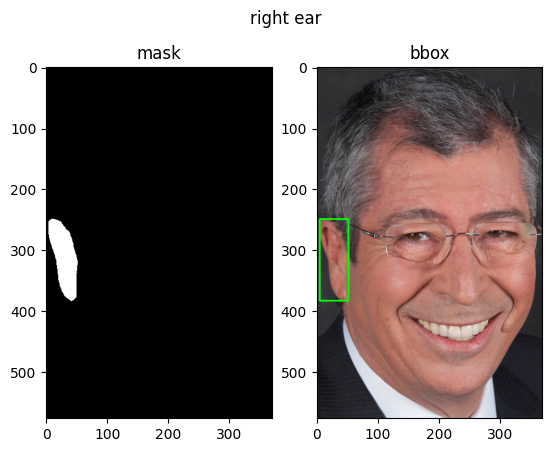

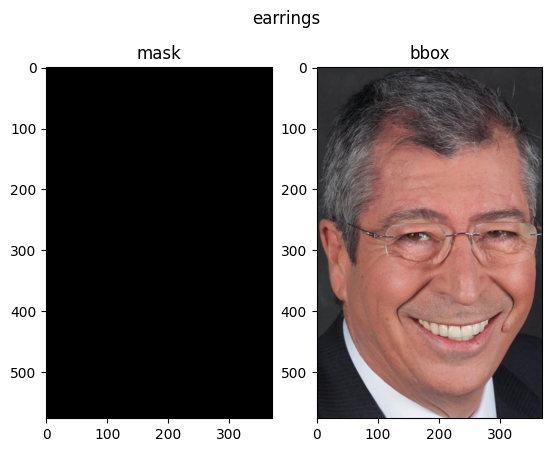

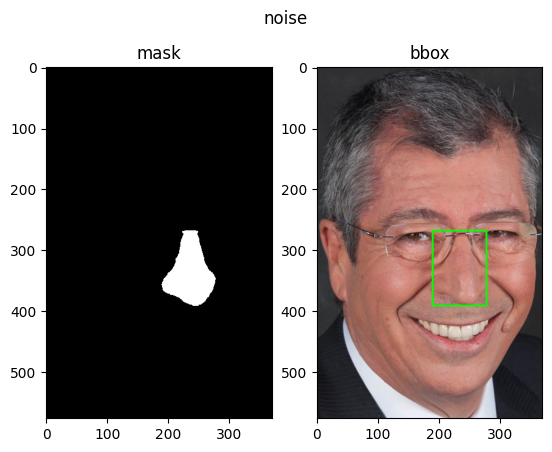

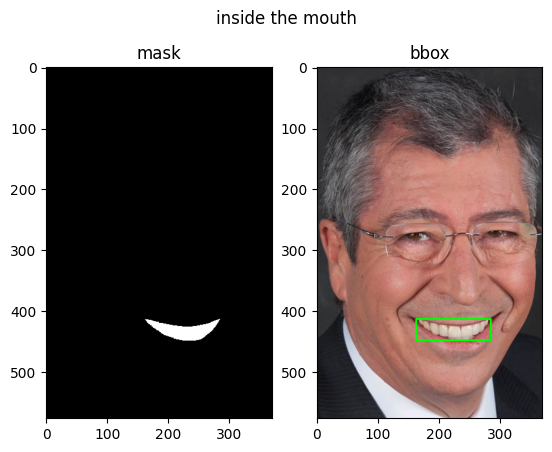

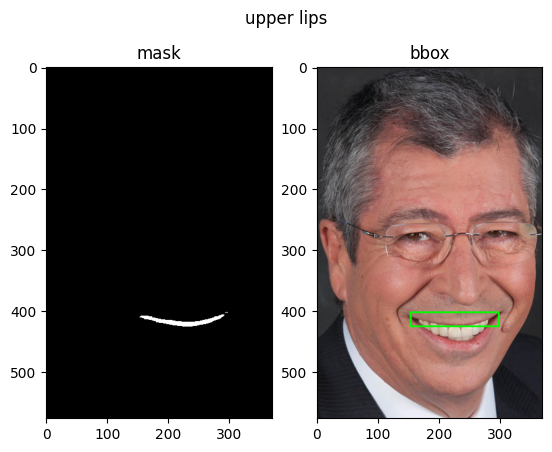

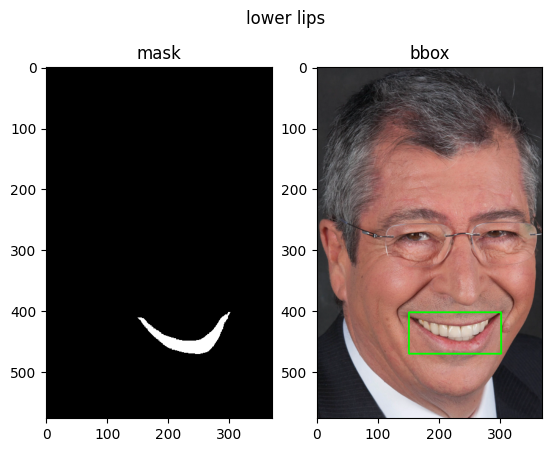

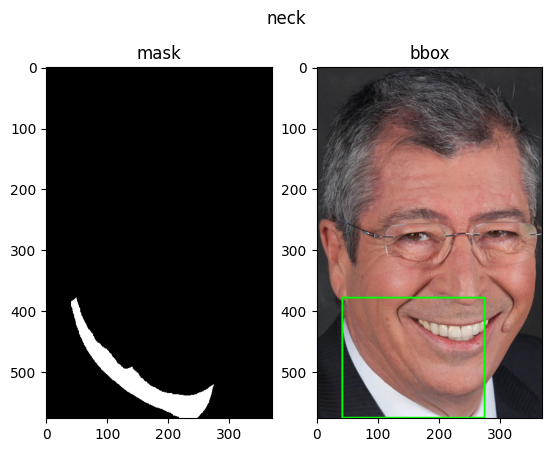

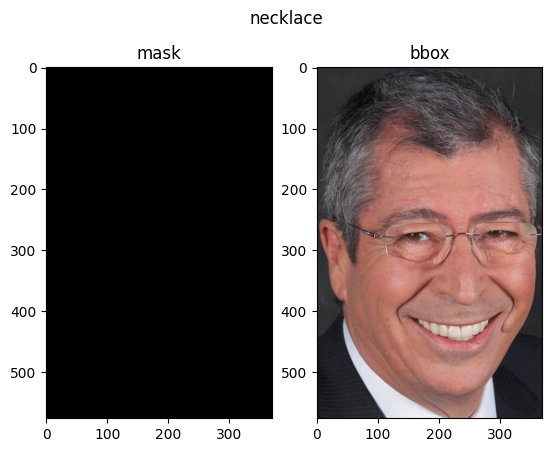

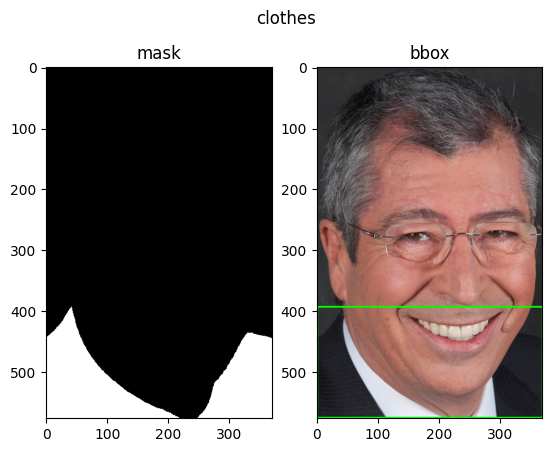

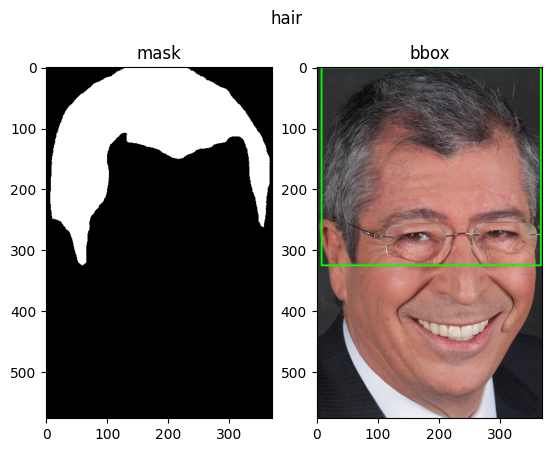

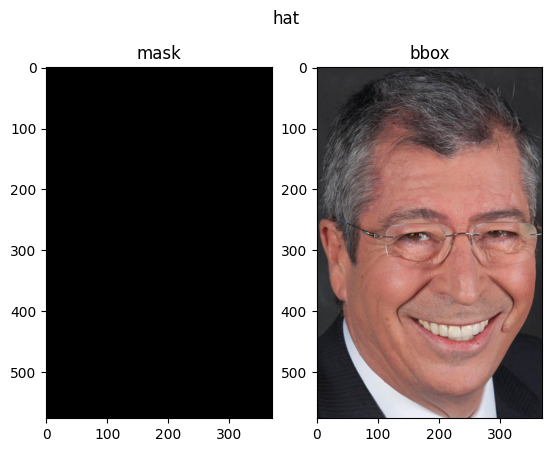

In [48]:
for i, mask in enumerate(masks):

    # Draw the rectangle on the color image
    im_draw = img_origin.copy()
    if bboxes[i] is not None:
        cv2.rectangle(im_draw, (bboxes[i][0], bboxes[i][1]), (bboxes[i][2], bboxes[i][3]), (0, 255, 0), 2)

    fig, axes = plt.subplots(1,2)
    axes[0].imshow(mask, cmap='gray')
    axes[0].set_title('mask')
    axes[1].imshow(cv2.cvtColor(im_draw, cv2.COLOR_BGR2RGB))
    axes[1].set_title('bbox')
    plt.suptitle(face_parts[i])
    plt.show()